Bibliotecas e Importação das bases

In [9]:
import pandas as pd
import geopandas as gpd
import string
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import folium
import matplotlib.pyplot as plt
import mapclassify
from shapely.geometry import Point
import missingno as msno
import difflib

In [10]:
#importando as datas
datas=pd.read_csv(r"C:\Users\SilvaVal07\OneDrive - Electrolux\Desktop\Electrolux\Internal_Projects_Valmerson\TRI 5\Colin - TW\dados\dates.csv")

#importando os metadados
metadados=pd.read_csv(r"C:\Users\SilvaVal07\OneDrive - Electrolux\Desktop\Electrolux\Internal_Projects_Valmerson\TRI 5\Colin - TW\dados\metadata_latinamerica.csv")

#importando as dados
dados=pd.read_csv(r"C:\Users\SilvaVal07\OneDrive - Electrolux\Desktop\Electrolux\Internal_Projects_Valmerson\TRI 5\Colin - TW\dados\tw_latinamerica.csv")

Tratando dimensão espacial

In [11]:
# Adicione uma nova linha com os nomes das colunas
new_header = pd.DataFrame([metadados.columns], columns=metadados.columns)

# Concatene a nova linha com o DataFrame original
dados_recorte_adj_with_header = pd.concat([new_header, metadados], ignore_index=True)

# renomeie o dados_recorte_adj substituindo os nomes errados com os valores corretos 
new_header = ['lat', 'long', 'x'] 
dados_recorte_adj_with_header.columns=new_header

In [12]:
#criando uma função para nomear individualmente cada linha do dados_recorte_adj 
labels=[]
def generated_labels(n):
    for i in range(n):
        label = ''
        while i >= 0:
            label = string.ascii_uppercase[i%26] + label 
            i = i // 26 - 1
        labels.append(label)
    return labels

numero_linhas = len(dados_recorte_adj_with_header) 
labels = generated_labels(numero_linhas)


In [13]:
#incluindo a nova linha com
dados_recorte_adj_with_header['labels'] = labels

In [14]:
nova_ordem = ['labels','lat','long','x']
dados_recorte_adj_with_header=dados_recorte_adj_with_header[nova_ordem]

In [15]:
dados_recorte_adj_with_header

,labels,lat,long,x
0,A,32.433,-99.85,545.3
1,B,24.583,-81.683,1.8
2,C,25.788,-80.317,1.4
3,D,25.483,-80.383,1.5
4,E,25.65,-80.433,2.0
...,...,...,...,...
401,OL,30.511,-99.766,533.1
402,OM,32.567,-117.117,7.0
403,ON,30.393,-84.353,20.7
404,OO,30.217,-81.883,25.3


In [22]:
dados_recorte_adj_with_header.to_excel(r"C:\Users\SilvaVal07\OneDrive - Electrolux\Desktop\Electrolux\Internal_Projects_Valmerson\TRI 5\coordenadas.xlsx")

In [17]:
#definindo um id para cada linha do df 
dados_recorte_adj_with_header['id'] = range(1, len(dados_recorte_adj_with_header) + 1)

#ajustando a ordem das colunas 
nova_ordem = ['id','labels','lat','long','x']
dados_recorte_adj_with_header=dados_recorte_adj_with_header[nova_ordem]

In [19]:
dados_recorte_adj_with_header['geometry'] = dados_recorte_adj_with_header.apply(lambda row: Point(row['long'], row['lat']), axis=1)

C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\148717770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_recorte_adj_with_header['geometry'] = dados_recorte_adj_with_header.apply(lambda row: Point(row['long'], row['lat']), axis=1)


In [20]:
# Converta o DataFrame em GeoDataFrame
gdf = gpd.GeoDataFrame(dados_recorte_adj_with_header, geometry='geometry')
gdf.crs = 'EPSG:4326' 

In [21]:
# Plotar o GeoDataFrame
# gdf.plot(marker='o', color='red', markersize=1)

map = gdf.explore(
    tooltip=['labels'],  # Mostrar valor da coluna "Name" ao passar o mouse
    marker_kwds={'color': 'blue', 'fillOpacity': 0.6},
    zoom_start=6
)

map

In [23]:
teste = gdf

In [26]:
teste

,id,labels,lat,long,x,geometry
0,1,A,32.433,-99.85,545.3,POINT (-99.85 32.433)
1,2,B,24.583,-81.683,1.8,POINT (-81.683 24.583)
2,3,C,25.788,-80.317,1.4,POINT (-80.317 25.788)
3,4,D,25.483,-80.383,1.5,POINT (-80.383 25.483)
4,5,E,25.65,-80.433,2.0,POINT (-80.433 25.65)
...,...,...,...,...,...,...
401,402,OL,30.511,-99.766,533.1,POINT (-99.766 30.511)
402,403,OM,32.567,-117.117,7.0,POINT (-117.117 32.567)
403,404,ON,30.393,-84.353,20.7,POINT (-84.353 30.393)
404,405,OO,30.217,-81.883,25.3,POINT (-81.883 30.217)


Tratando dimensão temporal

In [28]:
#recortando apenas a coluna "label" da base de nomes e transformando ela em lista
df_with_header_label = dados_recorte_adj_with_header['labels']
lista_labels = df_with_header_label.values.tolist()

In [29]:
#criando uma versão alternativa de "dados"
dados_check = dados

In [30]:
# renomeie o df substituindo os nomes errados com os valores corretos 
dados_check.columns=lista_labels

In [31]:
dados_check

,A,B,C,D,E,F,G,H,I,J,...,OG,OH,OI,OJ,OK,OL,OM,ON,OO,OP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33962,6.41,21.43,20.86,20.51,20.93,19.61,18.90,17.80,16.88,18.66,...,8.02,6.02,18.30,14.22,8.60,NaN,NaN,NaN,19.00,18.03
33963,5.93,19.94,18.66,19.09,18.30,17.84,19.26,16.49,13.73,15.04,...,5.04,4.00,13.73,12.89,8.83,NaN,NaN,NaN,13.40,11.99
33964,6.28,19.06,16.49,17.22,16.88,16.10,17.47,14.09,12.41,14.09,...,9.69,8.10,12.80,10.94,7.61,NaN,NaN,NaN,11.00,10.49
33965,7.76,16.46,15.16,15.47,14.62,13.76,15.81,12.07,9.80,10.25,...,10.89,8.47,9.79,13.07,10.00,NaN,NaN,NaN,8.47,7.27


In [32]:
# Duplicando datas para salvar backup
datas_check = datas

# Adicione uma nova linha com os nomes das colunas
trat_datas = pd.DataFrame([datas_check.columns], columns=datas_check.columns)

# Concatene a nova linha com o DataFrame original
trat_datas_head = pd.concat([trat_datas, datas_check], ignore_index=True)

# renomeie o df substituindo os nomes errados com os valores corretos 
new_header = ['year', 'month', 'day'] 
trat_datas_head.columns=new_header

In [33]:
dados_completo = pd.concat([trat_datas_head, dados_check], axis=1)

In [34]:
dados_completo

,year,month,day,A,B,C,D,E,F,G,...,OG,OH,OI,OJ,OK,OL,OM,ON,OO,OP
0,1931,1,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1931,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1931,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1931,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33963,2023,12,27,5.93,19.94,18.66,19.09,18.30,17.84,19.26,...,5.04,4.00,13.73,12.89,8.83,NaN,NaN,NaN,13.40,11.99
33964,2023,12,28,6.28,19.06,16.49,17.22,16.88,16.10,17.47,...,9.69,8.10,12.80,10.94,7.61,NaN,NaN,NaN,11.00,10.49
33965,2023,12,29,7.76,16.46,15.16,15.47,14.62,13.76,15.81,...,10.89,8.47,9.79,13.07,10.00,NaN,NaN,NaN,8.47,7.27
33966,2023,12,30,8.31,17.05,13.99,14.33,14.74,14.52,14.81,...,9.76,6.75,12.43,19.27,14.46,NaN,NaN,NaN,9.99,8.33


In [35]:
dados_completo

,year,month,day,A,B,C,D,E,F,G,...,OG,OH,OI,OJ,OK,OL,OM,ON,OO,OP
0,1931,1,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1931,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1931,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1931,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33963,2023,12,27,5.93,19.94,18.66,19.09,18.30,17.84,19.26,...,5.04,4.00,13.73,12.89,8.83,NaN,NaN,NaN,13.40,11.99
33964,2023,12,28,6.28,19.06,16.49,17.22,16.88,16.10,17.47,...,9.69,8.10,12.80,10.94,7.61,NaN,NaN,NaN,11.00,10.49
33965,2023,12,29,7.76,16.46,15.16,15.47,14.62,13.76,15.81,...,10.89,8.47,9.79,13.07,10.00,NaN,NaN,NaN,8.47,7.27
33966,2023,12,30,8.31,17.05,13.99,14.33,14.74,14.52,14.81,...,9.76,6.75,12.43,19.27,14.46,NaN,NaN,NaN,9.99,8.33


In [ ]:
#apresenta chart com preenchimento das colunas 
msno.matrix(dados_completo)

In [ ]:
#apresenta chart com preenchimento das linhas 
msno.bar(dados_completo)

Vizualiznado a evolução da temperatura do bulbo umido 

In [36]:
dados_completo_chart = dados_completo

In [37]:
#Transformando a coluna ano em numero para permitir o filtro
dados_completo_chart['year'] = pd.to_numeric(dados_completo_chart['year'], errors='coerce')

In [38]:
type(dados_completo_chart['year'])

pandas.core.series.Series

In [39]:
#filtrando a base com dados a partir de 1970
# Club of Rome - os limites do crescimento
# Conferência de Estolckolm em 1972 (a base para )
# IPCC em 1982
# Rio 92 
dados_recorte_1970 = dados_completo_chart.loc[dados_completo_chart['year'] > 1969]

In [40]:
dados_recorte_1970

,year,month,day,A,B,C,D,E,F,G,...,OG,OH,OI,OJ,OK,OL,OM,ON,OO,OP
14245,1970,1,1,2.00,22.00,21.62,21.64,NaN,19.01,NaN,...,NaN,NaN,11.68,NaN,6.38,NaN,NaN,NaN,9.40,8.01
14246,1970,1,2,3.46,24.12,23.20,23.59,NaN,19.21,NaN,...,NaN,NaN,10.75,NaN,4.68,NaN,NaN,NaN,7.48,7.21
14247,1970,1,3,3.73,18.30,16.16,15.99,NaN,14.32,NaN,...,NaN,NaN,6.94,NaN,4.68,NaN,NaN,NaN,6.40,5.27
14248,1970,1,4,4.26,19.55,17.19,17.92,NaN,15.83,NaN,...,NaN,NaN,13.74,NaN,7.57,NaN,NaN,NaN,11.31,7.29
14249,1970,1,5,-3.95,23.21,21.83,21.47,NaN,21.45,NaN,...,NaN,NaN,18.49,NaN,3.08,NaN,NaN,NaN,15.79,10.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33963,2023,12,27,5.93,19.94,18.66,19.09,18.30,17.84,19.26,...,5.04,4.00,13.73,12.89,8.83,NaN,NaN,NaN,13.40,11.99
33964,2023,12,28,6.28,19.06,16.49,17.22,16.88,16.10,17.47,...,9.69,8.10,12.80,10.94,7.61,NaN,NaN,NaN,11.00,10.49
33965,2023,12,29,7.76,16.46,15.16,15.47,14.62,13.76,15.81,...,10.89,8.47,9.79,13.07,10.00,NaN,NaN,NaN,8.47,7.27
33966,2023,12,30,8.31,17.05,13.99,14.33,14.74,14.52,14.81,...,9.76,6.75,12.43,19.27,14.46,NaN,NaN,NaN,9.99,8.33


In [41]:
dados_recorte_1970_teste = dados_recorte_1970

In [42]:

# Criando a coluna 'ano_mes'
dados_recorte_1970_teste['ano_mes'] = dados_recorte_1970_teste['year'].astype(str) + '-' + dados_recorte_1970_teste['month'].astype(str)

# Reordenando as colunas para que 'ano_mes' fique no início
colunas = ['ano_mes'] + [coluna for coluna in dados_recorte_1970_teste.columns if coluna != 'ano_mes']
dados_recorte_1970_teste = dados_recorte_1970_teste[colunas]


C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\2062746109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_recorte_1970_teste['ano_mes'] = dados_recorte_1970_teste['year'].astype(str) + '-' + dados_recorte_1970_teste['month'].astype(str)


In [43]:
dados_recorte_1970_teste

,ano_mes,year,month,day,A,B,C,D,E,F,...,OG,OH,OI,OJ,OK,OL,OM,ON,OO,OP
14245,1970-1,1970,1,1,2.00,22.00,21.62,21.64,NaN,19.01,...,NaN,NaN,11.68,NaN,6.38,NaN,NaN,NaN,9.40,8.01
14246,1970-1,1970,1,2,3.46,24.12,23.20,23.59,NaN,19.21,...,NaN,NaN,10.75,NaN,4.68,NaN,NaN,NaN,7.48,7.21
14247,1970-1,1970,1,3,3.73,18.30,16.16,15.99,NaN,14.32,...,NaN,NaN,6.94,NaN,4.68,NaN,NaN,NaN,6.40,5.27
14248,1970-1,1970,1,4,4.26,19.55,17.19,17.92,NaN,15.83,...,NaN,NaN,13.74,NaN,7.57,NaN,NaN,NaN,11.31,7.29
14249,1970-1,1970,1,5,-3.95,23.21,21.83,21.47,NaN,21.45,...,NaN,NaN,18.49,NaN,3.08,NaN,NaN,NaN,15.79,10.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33963,2023-12,2023,12,27,5.93,19.94,18.66,19.09,18.30,17.84,...,5.04,4.00,13.73,12.89,8.83,NaN,NaN,NaN,13.40,11.99
33964,2023-12,2023,12,28,6.28,19.06,16.49,17.22,16.88,16.10,...,9.69,8.10,12.80,10.94,7.61,NaN,NaN,NaN,11.00,10.49
33965,2023-12,2023,12,29,7.76,16.46,15.16,15.47,14.62,13.76,...,10.89,8.47,9.79,13.07,10.00,NaN,NaN,NaN,8.47,7.27
33966,2023-12,2023,12,30,8.31,17.05,13.99,14.33,14.74,14.52,...,9.76,6.75,12.43,19.27,14.46,NaN,NaN,NaN,9.99,8.33


In [44]:
# Agrupando por 'ano_mes' e calculando a média para as demais colunas
dados_recorte_1970_mensal = dados_recorte_1970_teste.groupby('ano_mes').mean().reset_index()


In [45]:
#retirando a coluna "day"
dados_recorte_1970_mensal = dados_recorte_1970_mensal.drop(columns=['day'])

In [46]:
dados_recorte_1970_mensal_teste = dados_recorte_1970_mensal

In [47]:
#melt na tabela principal 
melt_dados_recorte_1970_mensal = pd.melt(dados_recorte_1970_mensal_teste, id_vars=['ano_mes','year','month'], var_name='Attribute', value_name='Value', ignore_index=True)

In [48]:
melt_dados_recorte_1970_mensal

,ano_mes,year,month,Attribute,Value
0,1970-1,1970.0,1.0,A,6.416452
1,1970-10,1970.0,10.0,A,14.786452
2,1970-11,1970.0,11.0,A,10.139000
3,1970-12,1970.0,12.0,A,10.561333
4,1970-2,1970.0,2.0,A,9.744286
...,...,...,...,...,...
263083,2023-5,2023.0,5.0,OP,20.567097
263084,2023-6,2023.0,6.0,OP,23.795000
263085,2023-7,2023.0,7.0,OP,26.411905
263086,2023-8,2023.0,8.0,OP,26.280323


Tabela final e plotagem

In [49]:
plot_data_total=melt_dados_recorte_1970_mensal

In [55]:
plot_data_x = plot_data_total.loc[plot_data_total['Attribute'] == "HX"]
plot_data_a = plot_data_total.loc[plot_data_total['Attribute'] == "HX"]
plot_data_y = plot_data_total.loc[plot_data_total['Attribute'] == "HX"]

In [56]:
final_table['Value'] = final_table['Value'].fillna(0)

C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\674960183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_x['Value'] = plot_data_x['Value'].fillna(0)


In [57]:

#convertendo as colunas que serão chamadas na tabela dinâmica em números para garantir o ordenamento
plot_data_a['year'] = pd.to_numeric(plot_data_a['year'], errors='coerce')
plot_data_a['month'] = pd.to_numeric(plot_data_a['month'], errors='coerce')
plot_data_a['Value'] = pd.to_numeric(plot_data_a['Value'], errors='coerce')


C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\3171391633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_a['year'] = pd.to_numeric(plot_data_a['year'], errors='coerce')
C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\3171391633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_a['month'] = pd.to_numeric(plot_data_a['month'], errors='coerce')
C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\3171391633.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

In [58]:
#COLUNA DE VALORES - lidando com os casos de preenchimento que estão como infinito ou NaN (not a number) 
plot_data_a['Value'] = plot_data_a['Value'].replace([float('inf'), -float('inf')], pd.NA) #substituindo o infitito pelo na 
plot_data_a['Value'] = plot_data_a['Value'].fillna(0) #preenchendo o na com 0
plot_data_a['Value'] = plot_data_a['Value'].astype('int64') #transformando os valores em inteiros

C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\984142822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_a['Value'] = plot_data_a['Value'].replace([float('inf'), -float('inf')], pd.NA) #substituindo o infitito pelo na
C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\984142822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_a['Value'] = plot_data_a['Value'].fillna(0) #preenchendo o na com 0
C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\984142822.py:4: SettingWi

In [59]:
#Transformando os valores de "month" para inteiros para garantir o ordenamento da coluna e também evitar ".0" 
plot_data_a['month'] = plot_data_a['month'].astype('int64')
plot_data_a['year'] = plot_data_a['year'].astype('int64')

C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\526154640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_a['month'] = plot_data_a['month'].astype('int64')
C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\526154640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_a['year'] = plot_data_a['year'].astype('int64')


In [60]:
plot_data_a['Attribute'].unique()

array(['HX'], dtype=object)

In [61]:
plot_data_a.dtypes

ano_mes      object
year          int64
month         int64
Attribute    object
Value         int64
dtype: object

In [62]:
dinamica = plot_data_a.pivot_table(
    index='month', 
    columns='year', 
    values='Value', aggfunc='sum')

In [63]:
dinamica

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
month,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,26,25,25,25,25,25,25,...,25,24,25,25,26,25,26,25,25,25
2,0,0,0,25,25,25,25,25,26,25,...,25,25,25,24,25,26,26,25,25,25
3,0,0,0,26,25,25,25,25,25,25,...,25,25,25,25,26,26,26,24,25,25
4,0,0,0,26,25,25,25,25,25,25,...,25,25,25,25,26,26,26,25,26,25
5,0,0,0,25,25,25,25,25,25,25,...,25,25,25,26,26,27,27,26,24,26
6,0,0,0,25,25,25,25,25,25,25,...,25,25,25,25,26,26,26,25,25,25
7,0,0,0,25,25,25,25,25,25,25,...,25,25,25,25,26,26,25,25,26,25
8,0,0,0,25,25,25,25,26,25,25,...,25,25,25,26,26,25,24,25,25,26
9,0,0,0,26,25,25,26,26,25,26,...,25,26,25,26,26,26,25,25,26,26


Text(220.72222222222223, 0.5, 'Mês')

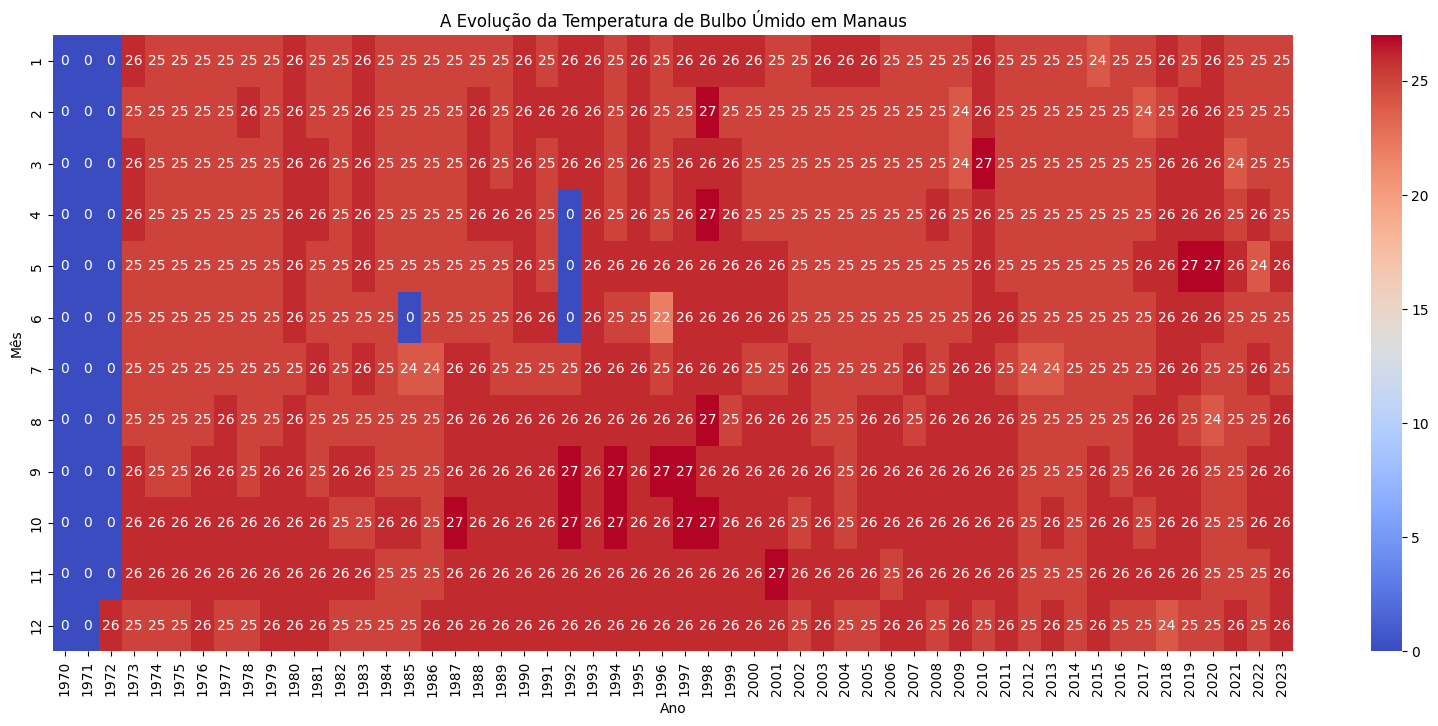

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o heatmap
plt.figure(figsize=(20, 8))  # Ajuste o tamanho da figura conforme necessário
sns.heatmap(dinamica, annot=True, cmap='coolwarm', fmt='d') 

#outras opções de cores podem ser 'YlGnBu' ou 'viridis' ou 'coolwarm'

plt.title('A Evolução da Temperatura de Bulbo Úmido em Manaus')
plt.xlabel('Ano')
plt.ylabel('Mês')


C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\1064659790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_x['Value'] = plot_data_x['Value'].fillna(0)
C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\1064659790.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_x['year'] = pd.to_numeric(plot_data_x['year'], errors='coerce')
C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\1064659790.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

Text(220.72222222222223, 0.5, 'Mês')

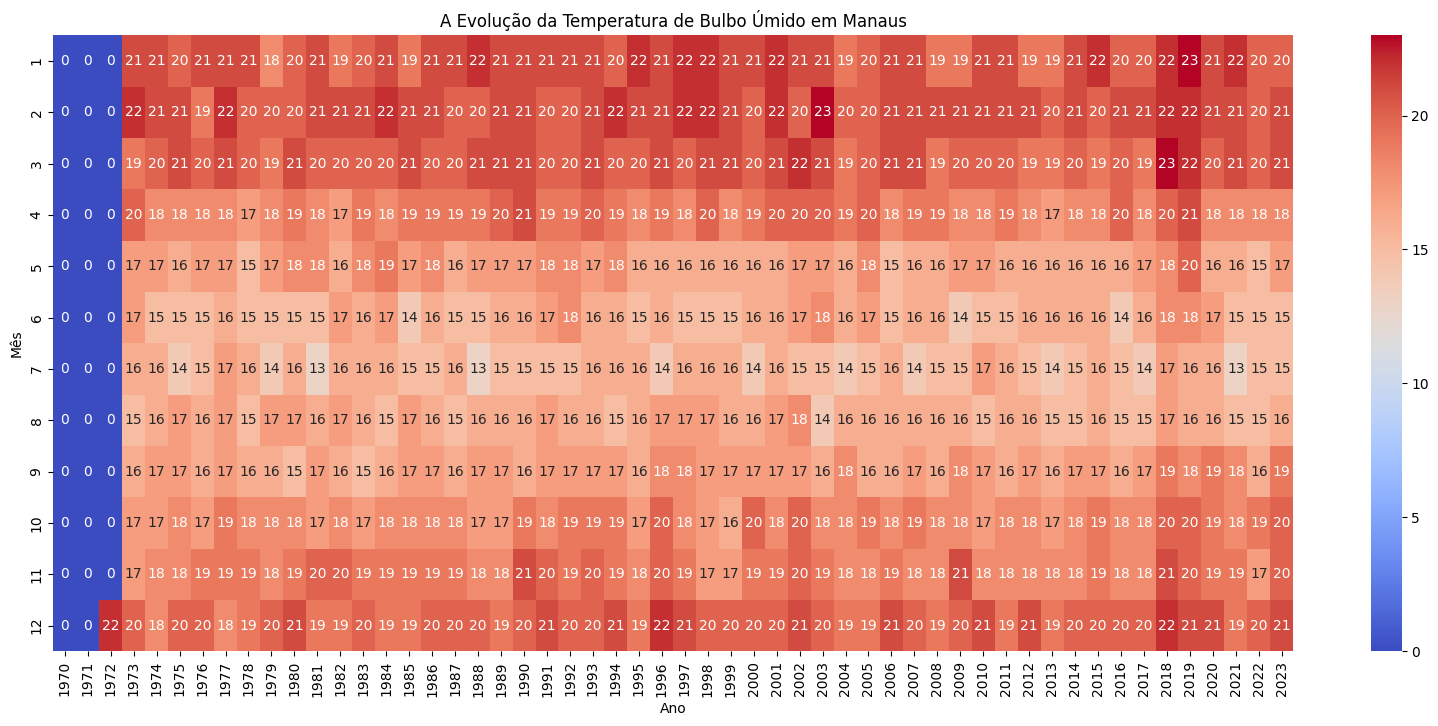

In [65]:
plot_data_total=melt_dados_recorte_1970_mensal

plot_data_x = plot_data_total.loc[plot_data_total['Attribute'] == "JD"]
plot_data_x['Value'] = plot_data_x['Value'].fillna(0)

#convertendo as colunas que serão chamadas na tabela dinâmica em números para garantir o ordenamento
plot_data_x['year'] = pd.to_numeric(plot_data_x['year'], errors='coerce')
plot_data_x['month'] = pd.to_numeric(plot_data_x['month'], errors='coerce')
plot_data_x['Value'] = pd.to_numeric(plot_data_x['Value'], errors='coerce')

#COLUNA DE VALORES - lidando com os casos de preenchimento que estão como infinito ou NaN (not a number) 
plot_data_x['Value'] = plot_data_x['Value'].replace([float('inf'), -float('inf')], pd.NA) #substituindo o infitito pelo na 
plot_data_x['Value'] = plot_data_x['Value'].fillna(0) #preenchendo o na com 0
plot_data_x['Value'] = plot_data_x['Value'].astype('int64') #transformando os valores em inteiros

#Transformando os valores de "month" para inteiros para garantir o ordenamento da coluna e também evitar ".0" 
plot_data_x['month'] = plot_data_x['month'].astype('int64')
plot_data_x['year'] = plot_data_x['year'].astype('int64')
plot_data_x['Attribute'].unique()
plot_data_x.dtypes
dinamica = plot_data_x.pivot_table(
    index='month', 
    columns='year', 
    values='Value', aggfunc='sum')
	

# Criar o heatmap
plt.figure(figsize=(20, 8))  # Ajuste o tamanho da figura conforme necessário
sns.heatmap(dinamica, annot=True, cmap='coolwarm', fmt='d') 

#outras opções de cores podem ser 'YlGnBu' ou 'viridis' ou 'coolwarm'

plt.title('A Evolução da Temperatura de Bulbo Úmido em Manaus')
plt.xlabel('Ano')
plt.ylabel('Mês')

C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_10004\2643938986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_x['Value'] = plot_data_x['Value'].fillna(0)
C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_10004\2643938986.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_x['year'] = pd.to_numeric(plot_data_x['year'], errors='coerce')
C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_10004\2643938986.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Text(220.72222222222223, 0.5, 'Mês')

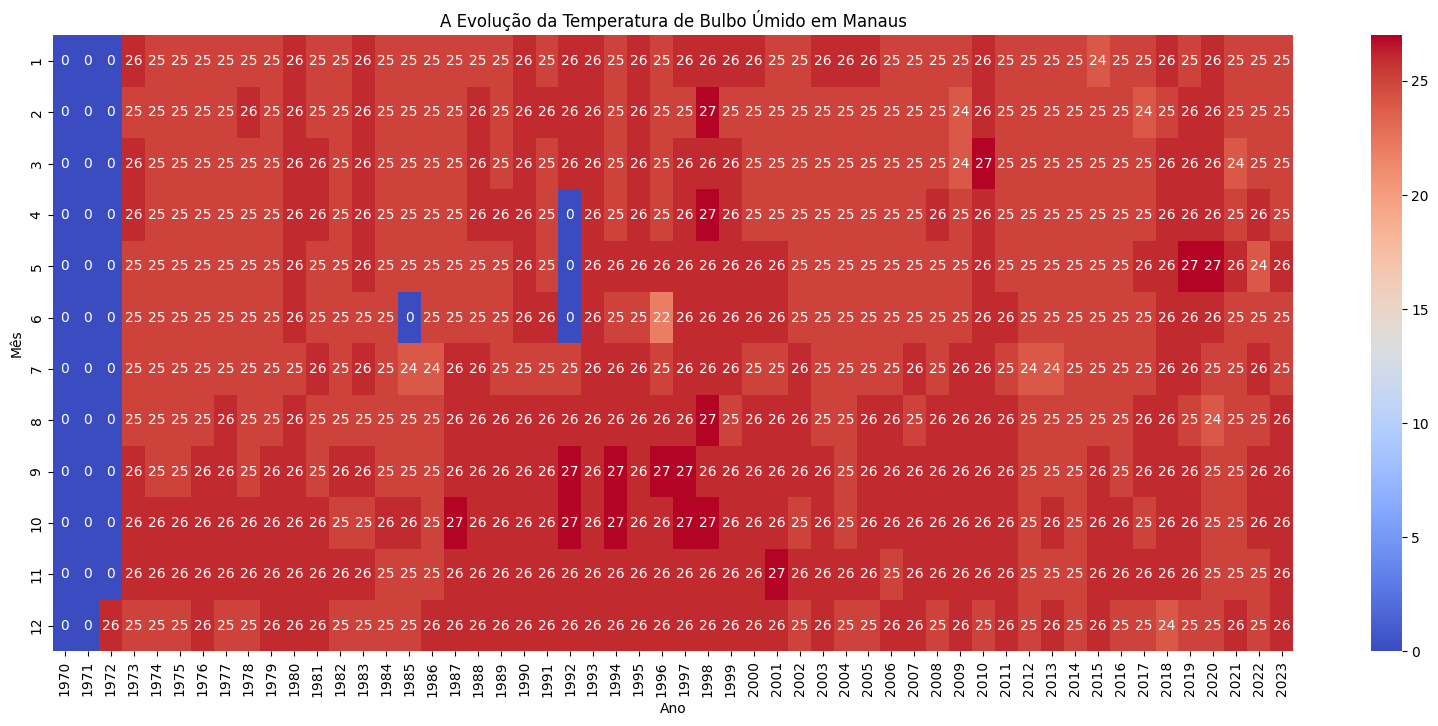

In [ ]:
plot_data_total=melt_dados_recorte_1970_mensal

plot_data_x = plot_data_total.loc[plot_data_total['Attribute'] == "HX"]
plot_data_x['Value'] = plot_data_x['Value'].fillna(0)

#convertendo as colunas que serão chamadas na tabela dinâmica em números para garantir o ordenamento
plot_data_x['year'] = pd.to_numeric(plot_data_x['year'], errors='coerce')
plot_data_x['month'] = pd.to_numeric(plot_data_x['month'], errors='coerce')
plot_data_x['Value'] = pd.to_numeric(plot_data_x['Value'], errors='coerce')

#COLUNA DE VALORES - lidando com os casos de preenchimento que estão como infinito ou NaN (not a number) 
plot_data_x['Value'] = plot_data_x['Value'].replace([float('inf'), -float('inf')], pd.NA) #substituindo o infitito pelo na 
plot_data_x['Value'] = plot_data_x['Value'].fillna(0) #preenchendo o na com 0
plot_data_x['Value'] = plot_data_x['Value'].astype('int64') #transformando os valores em inteiros

#Transformando os valores de "month" para inteiros para garantir o ordenamento da coluna e também evitar ".0" 
plot_data_x['month'] = plot_data_x['month'].astype('int64')
plot_data_x['year'] = plot_data_x['year'].astype('int64')
plot_data_x['Attribute'].unique()
plot_data_x.dtypes
dinamica = plot_data_x.pivot_table(
    index='month', 
    columns='year', 
    values='Value', aggfunc='sum')
	

# Criar o heatmap
plt.figure(figsize=(20, 8))  # Ajuste o tamanho da figura conforme necessário
sns.heatmap(dinamica, annot=True, cmap='coolwarm', fmt='d') 

#outras opções de cores podem ser 'YlGnBu' ou 'viridis' ou 'coolwarm'

plt.title('A Evolução da Temperatura de Bulbo Úmido em Manaus')
plt.xlabel('Ano')
plt.ylabel('Mês')

Recortando e renomeando o DF para a versão "Slop Chart"

In [79]:
# Tabela de dados completa
final_table = dados_recorte_1970
# Criando a coluna 'ano_mes'
final_table['ano_mes'] = final_table['year'].astype(str) + '-' + final_table['month'].astype(str)
# Reordenando as colunas para que 'ano_mes' fique no início
colunas = ['ano_mes'] + [coluna for coluna in final_table.columns if coluna != 'ano_mes']
final_table = final_table[colunas]
# Agrupando por 'ano_mes' e calculando a média para as demais colunas
final_table = final_table.groupby('ano_mes').mean().reset_index()
#retirando a coluna "day"
final_table = final_table.drop(columns=['day'])

C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\1188847031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table['ano_mes'] = final_table['year'].astype(str) + '-' + final_table['month'].astype(str)


In [85]:
#ajustando as colunas de ano e mes para virarem numero e permitirem calculo
final_table['year'] = pd.to_numeric(final_table['year'], errors='coerce')
final_table['month'] = pd.to_numeric(final_table['month'], errors='coerce')

#Transformando os valores de "month" para inteiros para garantir o ordenamento da coluna e também evitar ".0" 
final_table['month'] = final_table['month'].astype('int64')
final_table['year'] = final_table['year'].astype('int64')

In [88]:
# Dicionário com siglas de países e cidades
cities_by_country_code = {
    'NP': 'Buenos Aires-AR',
    'MW': 'Córdoba-AR',
    'NI': 'Rosario-AR',
    'ND': 'Mendoza-AR',
    'NQ': 'La Plata-AR',
    'MH': 'Tucumán-AR',
    'NV': 'Mar del Plata-AR',
    'ME': 'Salta-AR',
    'MT': 'San Juan-AR',
    'MY': 'Santa Fe-AR',
    'OH': 'Ushuaia-AR',
    'JD': 'São Paulo-BR',
    'JA': 'Rio de Janeiro-BR',
    'IM': 'Brasília-BR',
    'II': 'Salvador-BR',
    'HY': 'Fortaleza-BR',
    'IC': 'Natal-BR',
    'IE': 'Recife-BR',
    'IG': 'Maceió-BR',
    'IR': 'Vitória-BR',
    'HV': 'São Luis-BR',
    'HT': 'Belém-BR',
    'IB': 'Teresina-BR',
    'HU': 'Santarém-BR',
    'HR': 'Macapá-BR',
    'ID': 'Porto Velho-BR',
    'IL': 'Cuiabá-BR',
    'IQ': 'Campo Grande-BR',
    'JB': 'Londrina-BR',
    'JH': 'Florianópolis-BR',
    'IW': 'Campinas-BR',
    'IF': 'Rio Branco-BR',
    'JG': 'Curitiba-BR',
    'JK': 'Porto Alegre-BR',
    'HX': 'Manaus-BR',
    'LE': 'Concepción-CL',
    'LC': 'La Serena-CL',
    'KZ': 'Iquique-CL',
    'LG': 'Puerto Montt-CL',
    'HK': 'Bogotá-CO',
    'HI': 'Medellín-CO',
    'HL': 'Cali-CO',
    'HF': 'Barranquilla-CO',
    'HE': 'Cartagena-CO',
    'HG': 'Bucaramanga-CO',
    'HH': 'Cúcuta-CO',
    'HD': 'Santa Marta-CO',
    'HF': 'Barranquilla-CO',
    'JZ': 'Lima-PE',
    'KD': 'Pisco-PE',
    'KF': 'Arequipa-PE',
    'JX': 'Trujillo-PE',
    'KC': 'Cuzco-PE',
    'JT': 'Piura-PE',
    'JR': 'Iquitos-PE',
    'JV': 'Chiclayo-PE',
    'FA': 'Acapulco-MX',
    'EM': 'Toluca-MX',
    'DN': 'Monterrey-MX',
    'EO': 'Puebla-MX',
    'OM': 'Tijuana-MX',
    'DV': 'San Luis Potosí-MX',
    'MA': 'Montevideo-UY',
    'LT': 'Paysandú-UY',
    'LZ': 'Rocha-UY',
    'LM': 'Asunción-PY',
    'JF': 'Ciudad del Este-PY',
    'JO': 'Latacunga-EC',
    'JN': 'Manta-EC',
    'JP': 'Guayaquil-EC',
    'HO': 'Caracas-VE',
    'HP': 'Georgetown-GY',
    'HQ': 'Paramaribo-SR',
    'KO': 'Cochabamba-BO',
    'KR': 'Santa Cruz de la Sierra-BO',
    'KN': 'La Paz-BO',
    'GP': 'Panama City-PA',
    'GR': 'Santiago-PA',
    'GQ': 'David-PA',
    'GM': 'San José-CR',
    'GN': 'Limón-CR',
    'GO': 'Liberia-CR',
    'GK': 'Managua-NI',
    'GI': 'Tegucigalpa-HN',
    'GG': 'Catacamas-HN',
    'GH': 'Santa Rosa de Copán-HN',
    'FY': 'Guatemala City-GT',
    'FV': 'Belize City-BZ',
    'FH': 'Camagüey-CU',
    'FF': 'Havana-CU',
    'FG': 'Matanzas-CU',
    'FI': 'Santiago de Cuba-CU',
    'FM': 'Kingston-JM',
    'FL': 'Montego Bay-JM',
    'FR': 'Santo Domingo-DO',
    'FP': 'Santiago de los Caballeros-DO',
    'FK': 'George Town-KY',
    'FN': 'Port-au-Prince-HT',
    'GV': 'Marigot-DM',
    'GY': 'Christ Church-BB',
    'GZ': 'Piarco-TT',
    'FE': 'Nassau-BS',
}


In [90]:
#Renomeando as colunas para os nomes corretos das localizações
final_table = final_table.rename(columns=cities_by_country_code)

In [109]:
#nome das cidades para realizar o filtro no df total
cities = [
    "year",
    "month",     
    "Buenos Aires-AR",
    "Córdoba-AR",
    "Rosario-AR",
    "Mendoza-AR",
    "La Plata-AR",
    "Tucumán-AR",
    "Mar del Plata-AR",
    "Salta-AR",
    "San Juan-AR",
    "Santa Fe-AR",
    "Ushuaia-AR",
    "São Paulo-BR",
    "Rio de Janeiro-BR",
    "Brasília-BR",
    "Salvador-BR",
    "Fortaleza-BR",
    "Natal-BR",
    "Recife-BR",
    "Maceió-BR",
    "Vitória-BR",
    "São Luis-BR",
    "Belém-BR",
    "Teresina-BR",
    "Santarém-BR",
    "Macapá-BR",
    "Porto Velho-BR",
    "Cuiabá-BR",
    "Campo Grande-BR",
    "Londrina-BR",
    "Florianópolis-BR",
    "Campinas-BR",
    "Rio Branco-BR",
    "Curitiba-BR",
    "Porto Alegre-BR",
    "Manaus-BR",
    "Concepción-CL",
    "La Serena-CL",
    "Iquique-CL",
    "Puerto Montt-CL",
    "Bogotá-CO",
    "Medellín-CO",
    "Cali-CO",
    "Barranquilla-CO",
    "Cartagena-CO",
    "Bucaramanga-CO",
    "Cúcuta-CO",
    "Santa Marta-CO",
    "Barranquilla-CO",
    "Lima-PE",
    "Pisco-PE",
    "Arequipa-PE",
    "Trujillo-PE",
    "Cuzco-PE",
    "Piura-PE",
    "Iquitos-PE",
    "Chiclayo-PE",
    "Acapulco-MX",
    "Toluca-MX",
    "Monterrey-MX",
    "Puebla-MX",
    "Tijuana-MX",
    "San Luis Potosí-MX",
    "Montevideo-UY",
    "Paysandú-UY",
    "Rocha-UY",
    "Asunción-PY",
    "Ciudad del Este-PY",
    "Latacunga-EC",
    "Manta-EC",
    "Guayaquil-EC",
    "Caracas-VE",
    "Georgetown-GY",
    "Paramaribo-SR",
    "Cochabamba-BO",
    "Santa Cruz de la Sierra-BO",
    "La Paz-BO",
    "Panama City-PA",
    "Santiago-PA",
    "David-PA",
    "San José-CR",
    "Limón-CR",
    "Liberia-CR",
    "Managua-NI",
    "Tegucigalpa-HN",
    "Catacamas-HN",
    "Santa Rosa de Copán-HN",
    "Guatemala City-GT",
    "Belize City-BZ",
    "Camagüey-CU",
    "Havana-CU",
    "Matanzas-CU",
    "Santiago de Cuba-CU",
    "Kingston-JM",
    "Montego Bay-JM",
    "Santo Domingo-DO",
    "Santiago de los Caballeros-DO",
    "George Town-KY",
    "Port-au-Prince-HT",
    "Marigot-DM",
    "Christ Church-BB",
    "Piarco-TT",
    "Nassau-BS"
]


In [110]:
#Filtrando a tabela para aparecer somente os periodos e os as cidades 
hundredcities = final_table[cities]

In [114]:
# Agrupando por 'ano' e calculando a média para as demais colunas
hundredcities_year = hundredcities.groupby('year').mean().reset_index()

In [116]:
#retirando a coluna "Month"
hundredcities_year = hundredcities_year.drop(columns=['month'])

In [119]:
#Exportando o dado das 100 cidades por ano 
hundredcities_year.to_excel(r'C:\Users\SilvaVal07\OneDrive - Electrolux\Desktop\Electrolux\Internal_Projects_Valmerson\TRI 5\base_100_cidades_by_ano.xlsx')

Ajustando calculos das diferenças entre as décadas

In [121]:
hundredcities_decada = hundredcities_year

In [122]:
# Anos para cada período
periodo1 = range(1970, 1981)  # Primeira década: 1970 a 1980
periodo2 = range(1990, 2001)  # Década intermediária: 1990 a 2000
periodo3 = range(2013, 2024)  # Última década: 2013 a 2023


In [128]:
# Função para calcular médias por período
def calcular_media_por_periodo(df, cidade, anos):
    df_periodo = df[df['year'].isin(anos)]
    media = df_periodo[cidade].mean()
    return media

# Criar lista para o novo DataFrame
resultados = []

# Iterar sobre cada coluna (cidade) e calcular as médias
for cidade in hundredcities_decada.columns[1:]:  # Ignorar a coluna 'Ano'
    media_periodo1 = calcular_media_por_periodo(hundredcities_decada, cidade, periodo1)
    media_periodo2 = calcular_media_por_periodo(hundredcities_decada, cidade, periodo2)
    media_periodo3 = calcular_media_por_periodo(hundredcities_decada, cidade, periodo3)
    
    resultados.append({
        'Cidade': cidade,
        'Media_1970_1980': media_periodo1,
        'Media_1990_2000': media_periodo2,
        'Media_2013_2023': media_periodo3
    })

# Criar o novo DataFrame com as medidas
df_resultado = pd.DataFrame(resultados)



                            Cidade  \
0                  Buenos Aires-AR   
1                       Córdoba-AR   
2                       Rosario-AR   
3                       Mendoza-AR   
4                      La Plata-AR   
5                       Tucumán-AR   
6                 Mar del Plata-AR   
7                         Salta-AR   
8                      San Juan-AR   
9                      Santa Fe-AR   
10                      Ushuaia-AR   
11                    São Paulo-BR   
12               Rio de Janeiro-BR   
13                     Brasília-BR   
14                     Salvador-BR   
15                    Fortaleza-BR   
16                        Natal-BR   
17                       Recife-BR   
18                       Maceió-BR   
19                      Vitória-BR   
20                     São Luis-BR   
21                        Belém-BR   
22                     Teresina-BR   
23                     Santarém-BR   
24                       Macapá-BR   
25          

In [130]:
# Nome a ser removido
nome_para_remover = "Barranquilla-CO"

# Remover linhas onde 'Cidade' é igual a 'Barranquilla-CO'
df_resultado = df_resultado[df_resultado['Cidade'] != nome_para_remover]

# Mostrar o DataFrame resultante
print(df_resultado)

                            Cidade Media_1970_1980 Media_1990_2000  \
0                  Buenos Aires-AR       18.134583       16.703269   
1                       Córdoba-AR       17.263132        16.77742   
2                       Rosario-AR       18.464005       17.932135   
3                       Mendoza-AR       15.278158       14.808556   
4                      La Plata-AR        16.90745       16.278383   
5                       Tucumán-AR             NaN        18.73928   
6                 Mar del Plata-AR       16.084369       15.202045   
7                         Salta-AR       16.024197        15.26613   
8                      San Juan-AR        15.90179       14.652724   
9                      Santa Fe-AR       19.466798       18.567339   
10                      Ushuaia-AR        6.034749        6.047069   
11                    São Paulo-BR       18.817436       18.889892   
12               Rio de Janeiro-BR       22.889547       23.057643   
13                  

In [132]:
df_resultado.to_excel(r"C:\Users\SilvaVal07\OneDrive - Electrolux\Desktop\Electrolux\Internal_Projects_Valmerson\TRI 5\100_cidades_media_decadas.xlsx")


Calculando as diferenças entre décadas

In [133]:
df_resultado_variacao = df_resultado

In [135]:
df_resultado_variacao['13_23_vs_90_2000'] = df_resultado_variacao['Media_2013_2023'] - df_resultado_variacao['Media_1990_2000']

C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\678492883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultado_variacao['13_23_vs_90_2000'] = df_resultado_variacao['Media_2013_2023'] - df_resultado_variacao['Media_1990_2000']


In [138]:
df_resultado_variacao['90_2000_vs_70_80'] = df_resultado_variacao['Media_1990_2000'] - df_resultado_variacao['Media_1970_1980']

C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\2790298090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultado_variacao['90_2000_vs_70_80'] = df_resultado_variacao['Media_1990_2000'] - df_resultado_variacao['Media_1970_1980']


In [140]:
df_resultado_variacao['13_23_vs_70_80'] = df_resultado_variacao['Media_2013_2023'] - df_resultado_variacao['Media_1970_1980']

C:\Users\SilvaVal07\AppData\Local\Temp\ipykernel_8364\315223551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultado_variacao['13_23_vs_70_80'] = df_resultado_variacao['Media_2013_2023'] - df_resultado_variacao['Media_1970_1980']


In [143]:
df_resultado_variacao.to_excel(r'C:\Users\SilvaVal07\OneDrive - Electrolux\Desktop\Electrolux\Internal_Projects_Valmerson\TRI 5\100_cidades_variacoes.xlsx')

In [144]:
df_resultado_variacao

,Cidade,Media_1970_1980,Media_1990_2000,Media_2013_2023,13_23_vs_90_2000,90_2000_vs_70_80,13_23_vs_70_80
0,Buenos Aires-AR,18.134583,16.703269,17.001606,0.298337,-1.431314,-1.132977
1,Córdoba-AR,17.263132,16.77742,16.282184,-0.495236,-0.485712,-0.980949
2,Rosario-AR,18.464005,17.932135,17.58773,-0.344404,-0.53187,-0.876274
3,Mendoza-AR,15.278158,14.808556,14.341664,-0.466893,-0.469601,-0.936494
4,La Plata-AR,16.90745,16.278383,16.497034,0.218652,-0.629067,-0.410416
5,Tucumán-AR,NaN,18.73928,18.934623,0.195343,NaN,NaN
6,Mar del Plata-AR,16.084369,15.202045,15.100692,-0.101353,-0.882324,-0.983677
7,Salta-AR,16.024197,15.26613,15.884327,0.618197,-0.758067,-0.139869
8,San Juan-AR,15.90179,14.652724,14.5553,-0.097424,-1.249067,-1.34649
9,Santa Fe-AR,19.466798,18.567339,18.112248,-0.455091,-0.899459,-1.35455
